In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the CSV file
file_path = r"C:\Users\Admin\OneDrive - Sol Plaatje University\Documents\Thuthukani\Personal project\Datasets\CEAS_08.csv"

df = pd.read_csv(file_path, encoding='utf-8') 


In [3]:
# View column names and sample data
print("Columns:", df.columns.tolist())
df.head()


Columns: ['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls']


,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [4]:
# Overview of data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [5]:
# Count nulls per column
print("Null values per column:")
print(df.isnull().sum())


Null values per column:
sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64


In [6]:
df['label'].value_counts()

label
1    21842
0    17312
Name: count, dtype: int64

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [9]:
df["clean_subject"] = df["body"].apply(clean_text)

df[["body", "clean_subject"]].head(10)

,body,clean_subject
0,"Buck up, your troubles caused by small dimensi...",buck troubles caused small dimension soon beco...
1,\nUpgrade your sex and pleasures with these te...,upgrade sex pleasures techniques httpwwwbright...
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,daily top cnncom top videos stories aug pm edt...
3,Would anyone object to removing .so from this ...,would anyone object removing list tld basicall...
4,\nWelcomeFastShippingCustomerSupport\nhttp://7...,welcomefastshippingcustomersupport httpiwfnabl...
5,\n\n\n\n\nYo wu urS mo ou go rc ebo eForM rgi ...,yo wu urs mo ou go rc ebo eform rgi orewo iyv ...
6,We have fake Swiss Men's and Ladie's Replica \...,fake swiss mens ladies replica watches rolex p...
7,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,daily top cnncom top videos stories aug pm edt...
8,http://issues.apache.org/SpamAssassin/show_bug...,httpissuesapacheorgspamassassinshowbugcgiid wr...
9,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,daily top cnncom top videos stories aug pm edt...


In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [11]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun


In [12]:
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(str(text))
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_tokens]
    return lemmatized


In [13]:
df["subject_tokens"] = df["body"].apply(tokenize_and_lemmatize)

df[["body", "subject_tokens"]].head(10)

,body,subject_tokens
0,"Buck up, your troubles caused by small dimensi...","[Buck, up, ,, your, trouble, cause, by, small,..."
1,\nUpgrade your sex and pleasures with these te...,"[Upgrade, your, sex, and, pleasure, with, thes..."
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,"[>, +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=..."
3,Would anyone object to removing .so from this ...,"[Would, anyone, object, to, remove, .so, from,..."
4,\nWelcomeFastShippingCustomerSupport\nhttp://7...,"[WelcomeFastShippingCustomerSupport, http, :, ..."
5,\n\n\n\n\nYo wu urS mo ou go rc ebo eForM rgi ...,"[Yo, wu, urS, mo, ou, go, rc, ebo, eForM, rgi,..."
6,We have fake Swiss Men's and Ladie's Replica \...,"[We, have, fake, Swiss, Men, 's, and, Ladie, '..."
7,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,"[>, +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=..."
8,http://issues.apache.org/SpamAssassin/show_bug...,"[http, :, //issues.apache.org/SpamAssassin/sho..."
9,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,"[>, +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=..."


In [14]:
df["subject_text"] = df["subject_tokens"].apply(lambda tokens: " ".join(tokens))


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df["subject_text"])

# Optional: convert to DataFrame
df_bow = pd.DataFrame.sparse.from_spmatrix(X_bow, columns=bow_vectorizer.get_feature_names_out())


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df["subject_text"])

# Optional: convert to DataFrame
df_tfidf = pd.DataFrame.sparse.from_spmatrix(X_tfidf, columns=tfidf_vectorizer.get_feature_names_out())


In [17]:
print("BoW shape:", X_bow.shape)
print("TF-IDF shape:", X_tfidf.shape)
df_bow.head()
df_tfidf.head()


BoW shape: (39154, 5000)
TF-IDF shape: (39154, 5000)


,00,000,0000,000000,00000000,000000000,0001,005,00pm,01,...,zone,zonk,zoo,zoomhigh,zoomwill,zope,zukunft,zvllln,zürich,écrit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.270713,...,0,0,0,0,0,0,0,0,0,0
3,0.001124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Count word frequencies for each class
malicious_counts = Counter(df[df["label"] == 1]["subject_tokens"].explode())
safe_counts = Counter(df[df["label"] == 0]["subject_tokens"].explode())

# Convert to DataFrames
malicious_df = pd.DataFrame(malicious_counts.items(), columns=["word", "count"]).sort_values(by="count", ascending=False).head(20)
safe_df = pd.DataFrame(safe_counts.items(), columns=["word", "count"]).sort_values(by="count", ascending=False).head(20)


In [19]:
from wordcloud import WordCloud

In [20]:
# Join tokens into strings
malicious_text = " ".join(df[df["label"] == 1]["subject_tokens"].explode().dropna())
safe_text = " ".join(df[df["label"] == 0]["subject_tokens"].explode().dropna())


In [21]:
# Create word clouds
malicious_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(malicious_text)
safe_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(safe_text)


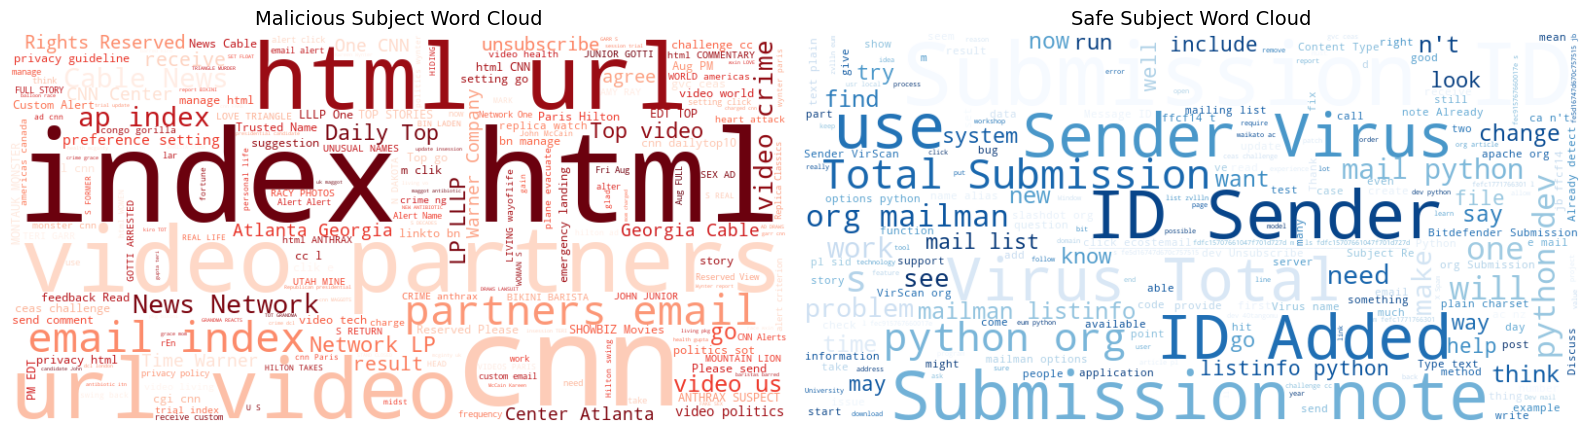

In [22]:
plt.figure(figsize=(16, 8))

# Malicious
plt.subplot(1, 2, 1)
plt.imshow(malicious_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Malicious Subject Word Cloud", fontsize=14)

# Safe
plt.subplot(1, 2, 2)
plt.imshow(safe_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Safe Subject Word Cloud", fontsize=14)

plt.tight_layout()
plt.show()


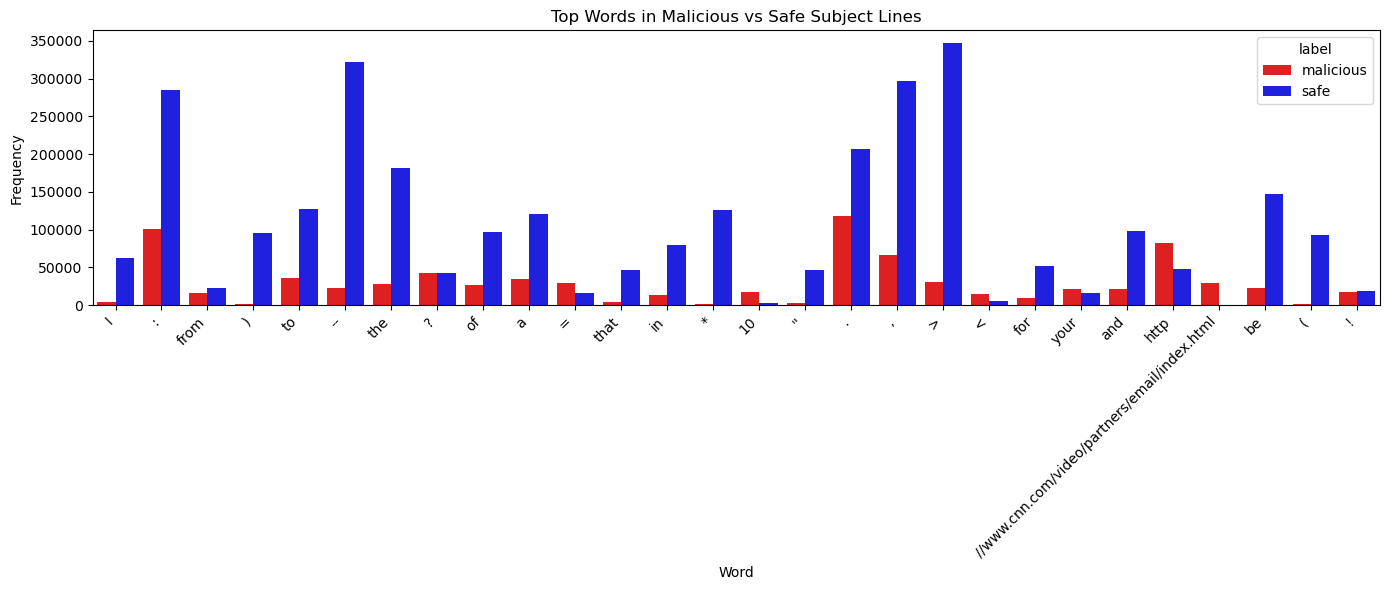

In [23]:
# Combine top words from both classes
top_words = set([w for w, _ in malicious_counts.most_common(20)] + [w for w, _ in safe_counts.most_common(20)])

# Build frequency table
word_freq_df = pd.DataFrame({
    "word": list(top_words),
    "malicious": [malicious_counts.get(w, 0) for w in top_words],
    "safe": [safe_counts.get(w, 0) for w in top_words]
})

# Melt for seaborn
word_freq_melted = word_freq_df.melt(id_vars="word", var_name="label", value_name="count")

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=word_freq_melted, x="word", y="count", hue="label", palette=["Red", "Blue"])
plt.title("Top Words in Malicious vs Safe Subject Lines")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [24]:
label_counts = df["label"].value_counts()
print(label_counts)

label
1    21842
0    17312
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9236\1978994674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette=["blue", "red"])


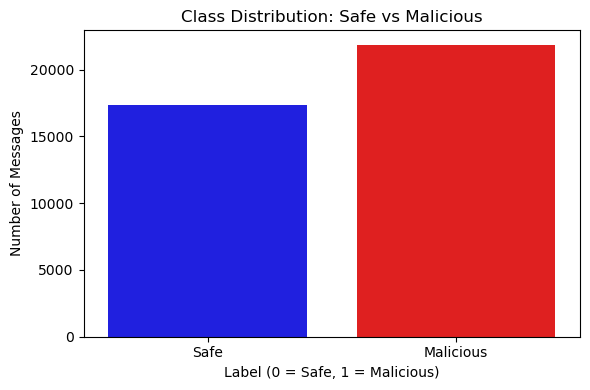

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="label", palette=["blue", "red"])
plt.title("Class Distribution: Safe vs Malicious")
plt.xlabel("Label (0 = Safe, 1 = Malicious)")
plt.ylabel("Number of Messages")
plt.xticks([0, 1], ["Safe", "Malicious"])
plt.tight_layout()
plt.show()


In [26]:
malicious_pct = label_counts[1] / label_counts.sum() * 100
safe_pct = label_counts[0] / label_counts.sum() * 100
print(f"Malicious: {malicious_pct:.2f}% | Safe: {safe_pct:.2f}%")


Malicious: 55.78% | Safe: 44.22%


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [28]:
X = X_tfidf
y = df["label"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [45]:
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0      0.992     0.990     0.991      3462
           1      0.992     0.994     0.993      4369

    accuracy                          0.992      7831
   macro avg      0.992     0.992     0.992      7831
weighted avg      0.992     0.992     0.992      7831

Confusion Matrix:
[[3426   36]
 [  27 4342]]


In [46]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 99.20%


In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [34]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [35]:
y_pred_nb = nb_model.predict(X_test)

# Detailed report
print(classification_report(y_test, y_pred_nb, digits=3))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


              precision    recall  f1-score   support

           0      0.943     0.995     0.968      3462
           1      0.996     0.952     0.973      4369

    accuracy                          0.971      7831
   macro avg      0.969     0.973     0.971      7831
weighted avg      0.972     0.971     0.971      7831

Confusion Matrix:
[[3444   18]
 [ 210 4159]]


In [36]:
# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

Naive Bayes Accuracy: 97.09%


In [37]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad
#tokenizer = Tokenizer(num_words=5000)
#tokenizer.fit_on_texts(df["subject_text"])
#X_seq = tokenizer.texts_to_sequences(df["subject_text"])
#X_pad = pad_sequences(X_seq, maxlen=50)

# Labels
#y = df["label"]

# Model
#model = Sequential([
 #  Embedding(input_dim=5000, output_dim=64, input_length=50),
  #LSTM(64, return_sequences=False),
   # Dropout(0.5),
    #Dense(1, activation='sigmoid')
#])

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X_pad, y, epochs=5, batch_size=32, validation_split=0.2)


In [38]:
#!pip install joblib

In [40]:
import joblib
#from tensorflow.keras.models import load_model

joblib.dump(tfidf_vectorizer,"vectorizer2.pkl")
joblib.dump(model,"NLP_Model2.pkl")
print('model and vectorizer saved successfully')

model and vectorizer saved successfully
